<a href="https://colab.research.google.com/github/A01703130/Extraccion-de-caracteristicas/blob/main/Actividad_4_(Extracci%C3%B3n_de_Caracter%C3%ADsticas)_Empezar_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Carga desde un archivo .xlsx sin indice
df= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [ ]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
#Imprimo los primeros 5 registro del dataframe
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [ ]:
#Filtro de las columnas seleccionadas
filtro=df.iloc[ : , [3,9,15,29,32,33,42,53,59,61,71,72,73,85,86,88,89,92,93,94]]  #Columnas no consecutivas 
filtro
# Estoy filtrando las columnas más relevantes según mi criterio

,_updated_by,232_type_of_store,184_store_devices,103_number_own_fridges,310_burnout,24_burnout,272_card_days_receive_money,193_sales_planning_tools,62_frequency_only_services,77_delivery_timeslots,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,279_changes_procurement_pandemic,157_frequency_organize_shelves,161_actions_stockouts,162_inventory_extra_space,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap
0,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,NaN,no,NaN,NaN,Software especializado,NaN,NaN,NaN,NaN,NaN,NaN,Semestralmente,Solicitar tiempo al cliente para conseguir el ...,0,NaN,NaN,NaN
1,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ofrecer un producto sustituto,Solicitar tiempo...",10%,NaN,NaN,NaN
2,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",NaN,no,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,Perder la venta,10%,NaN,NaN,NaN
3,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,NaN,no,NaN,0.0,Ninguna,NaN,NaN,NaN,NaN,NaN,NaN,Semanalmente,Ofrecer un producto sustituto,0,NaN,NaN,NaN
4,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,NaN,no,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mensualmente,"Informar al proveedor,Solicitar tiempo al clie...",0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,Emilio Garza,Micro-restaurant (aka. fondita),Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Francisco Adán,Micro-restaurant (aka. fondita),Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Valores nulos _updated_by
filtro["_updated_by"] =filtro["_updated_by"].fillna("Sin registro") 

<ipython-input-60-04f5a074f863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["_updated_by"] =filtro["_updated_by"].fillna("Sin registro")


In [ ]:
#Valores nulos 232_type_of_store
filtro["232_type_of_store"] =filtro["232_type_of_store"].fillna("Sin registro") 

<ipython-input-61-89b5e8228bce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["232_type_of_store"] =filtro["232_type_of_store"].fillna("Sin registro")


In [ ]:
#Valores nulos 184_store_devices
filtro["184_store_devices"] =filtro["184_store_devices"].fillna("Sin registro") 

<ipython-input-62-c4517d9b2893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["184_store_devices"] =filtro["184_store_devices"].fillna("Sin registro")


In [ ]:
#Valores nulos 103_number_own_fridges
filtro["103_number_own_fridges"] =filtro["103_number_own_fridges"].fillna("Sin registro") 

<ipython-input-63-822d23d80941>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["103_number_own_fridges"] =filtro["103_number_own_fridges"].fillna("Sin registro")


In [ ]:
#Valores nulos 310_burnout
filtro["310_burnout"] =filtro["310_burnout"].fillna("Sin registro") 

<ipython-input-64-81b9931fccf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["310_burnout"] =filtro["310_burnout"].fillna("Sin registro")


In [ ]:
#Valores nulos 24_burnout
filtro["24_burnout"] =filtro["24_burnout"].fillna("Sin registro") 

<ipython-input-65-a43802377a06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["24_burnout"] =filtro["24_burnout"].fillna("Sin registro")


In [ ]:
#Valores nulos 272_card_days_receive_money
filtro["272_card_days_receive_money"] =filtro["272_card_days_receive_money"].fillna("Sin registro")

<ipython-input-66-f14422201380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["272_card_days_receive_money"] =filtro["272_card_days_receive_money"].fillna("Sin registro")


In [ ]:
#Valores nulos 272_card_days_receive_money
filtro["272_card_days_receive_money"] =filtro["272_card_days_receive_money"].fillna("Sin registro")

<ipython-input-67-f14422201380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["272_card_days_receive_money"] =filtro["272_card_days_receive_money"].fillna("Sin registro")


In [ ]:
#Valores nulos 193_sales_planning_tools
filtro["193_sales_planning_tools"] =filtro["193_sales_planning_tools"].fillna("Sin registro")

<ipython-input-68-ed00dca809c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["193_sales_planning_tools"] =filtro["193_sales_planning_tools"].fillna("Sin registro")


In [ ]:
#Valores nulos 62_frequency_only_services
filtro["62_frequency_only_services"] =filtro["62_frequency_only_services"].fillna("Sin registro")

<ipython-input-69-ffe07831e5b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["62_frequency_only_services"] =filtro["62_frequency_only_services"].fillna("Sin registro")


In [ ]:
#Valores nulos 77_delivery_timeslots
filtro["77_delivery_timeslots"] =filtro["77_delivery_timeslots"].fillna("Sin registro")

<ipython-input-70-40ada3c25287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["77_delivery_timeslots"] =filtro["77_delivery_timeslots"].fillna("Sin registro")


In [ ]:
#Valores nulos 44_willingness_inventory_management_suppliers
filtro["44_willingness_inventory_management_suppliers"] =filtro["44_willingness_inventory_management_suppliers"].fillna("Sin registro")

<ipython-input-71-28ef941a1c6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["44_willingness_inventory_management_suppliers"] =filtro["44_willingness_inventory_management_suppliers"].fillna("Sin registro")


In [ ]:
#Valores nulos 45_willingness_reorder_suppliers
filtro["45_willingness_reorder_suppliers"] =filtro["45_willingness_reorder_suppliers"].fillna("Sin registro")

<ipython-input-72-5b87019629a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["45_willingness_reorder_suppliers"] =filtro["45_willingness_reorder_suppliers"].fillna("Sin registro")


In [ ]:
#Valores nulos 46_willingness_reorder_suppliers_variety
filtro["46_willingness_reorder_suppliers_variety"] =filtro["46_willingness_reorder_suppliers_variety"].fillna("Sin registro")

<ipython-input-73-07f66bb7bd17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["46_willingness_reorder_suppliers_variety"] =filtro["46_willingness_reorder_suppliers_variety"].fillna("Sin registro")


In [ ]:
#Valores nulos 279_changes_procurement_pandemic
filtro["279_changes_procurement_pandemic"] =filtro["279_changes_procurement_pandemic"].fillna("Sin registro")

<ipython-input-74-555888bad7f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["279_changes_procurement_pandemic"] =filtro["279_changes_procurement_pandemic"].fillna("Sin registro")


In [ ]:
#Valores nulos 157_frequency_organize_shelves
filtro["157_frequency_organize_shelves"] =filtro["157_frequency_organize_shelves"].fillna("Sin registro")

<ipython-input-75-66271c65b54b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["157_frequency_organize_shelves"] =filtro["157_frequency_organize_shelves"].fillna("Sin registro")


In [ ]:
#Valores nulos 161_actions_stockouts
filtro["161_actions_stockouts"] =filtro["161_actions_stockouts"].fillna("Sin registro")

<ipython-input-76-025171998807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["161_actions_stockouts"] =filtro["161_actions_stockouts"].fillna("Sin registro")


In [ ]:
#Valores nulos 162_inventory_extra_space
filtro["162_inventory_extra_space"] =filtro["162_inventory_extra_space"].fillna("Sin registro")

<ipython-input-77-5bd0ac401a52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["162_inventory_extra_space"] =filtro["162_inventory_extra_space"].fillna("Sin registro")


In [ ]:
#Valores nulos 250_technology_investment_operations
filtro["250_technology_investment_operations"] =filtro["250_technology_investment_operations"].fillna("Sin registro")

<ipython-input-78-cce350d94115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["250_technology_investment_operations"] =filtro["250_technology_investment_operations"].fillna("Sin registro")


In [ ]:
#Valores nulos 251_technology_investment_customers
filtro["251_technology_investment_customers"] =filtro["251_technology_investment_customers"].fillna("Sin registro")

<ipython-input-79-2fdb39fcb99e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["251_technology_investment_customers"] =filtro["251_technology_investment_customers"].fillna("Sin registro")


In [ ]:
#Valores nulos 254_technology_roadmap
filtro["254_technology_roadmap"] =filtro["254_technology_roadmap"].fillna("Sin registro")

<ipython-input-80-e517532128f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro["254_technology_roadmap"] =filtro["254_technology_roadmap"].fillna("Sin registro")


In [ ]:
filtro

,_updated_by,232_type_of_store,184_store_devices,103_number_own_fridges,310_burnout,24_burnout,272_card_days_receive_money,193_sales_planning_tools,62_frequency_only_services,77_delivery_timeslots,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,279_changes_procurement_pandemic,157_frequency_organize_shelves,161_actions_stockouts,162_inventory_extra_space,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap
0,Salomon Abdala Perez,Tailor,POS system (i.e. computer + bar code scanner +...,Sin registro,no,Sin registro,Sin registro,Software especializado,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semestralmente,Solicitar tiempo al cliente para conseguir el ...,0,Sin registro,Sin registro,Sin registro
1,Salomon Abdala Perez,Grocery store (aka. nanostore),Dataphone (i.e. card payments),Sin registro,no,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,"Ofrecer un producto sustituto,Solicitar tiempo...",10%,Sin registro,Sin registro,Sin registro
2,Salomon Abdala Perez,Grocery store (aka. nanostore),"Dataphone (i.e. card payments),POS system (i.e...",Sin registro,no,Sin registro,0.0,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semanalmente,Perder la venta,10%,Sin registro,Sin registro,Sin registro
3,Salomon Abdala Perez,Grocery store (aka. nanostore),POS system (i.e. computer + bar code scanner +...,Sin registro,no,Sin registro,0.0,Ninguna,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Semanalmente,Ofrecer un producto sustituto,0,Sin registro,Sin registro,Sin registro
4,Salomon Abdala Perez,Grocery store (aka. nanostore),Smartphone,Sin registro,no,Sin registro,1.0,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Mensualmente,"Informar al proveedor,Solicitar tiempo al clie...",0,Sin registro,Sin registro,Sin registro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro
167,Emilio Garza,Grocery store (aka. nanostore),"Analog cash register,Smartphone",Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro
168,Emilio Garza,Micro-restaurant (aka. fondita),Smartphone,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro
169,Francisco Adán,Micro-restaurant (aka. fondita),Analog cash register,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro


In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(filtro)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna _updated_by
table1= freq_tbl(filtro['_updated_by'])
table1

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620


<Axes: ylabel='frequency'>

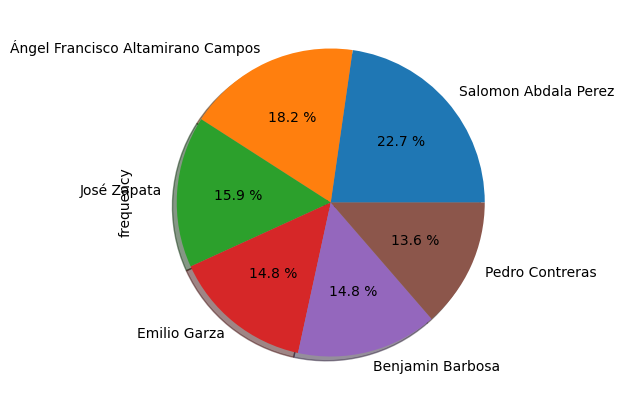

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 232_type_of_store
table1= freq_tbl(filtro['232_type_of_store'])
table1

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>6]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860


<Axes: ylabel='frequency'>

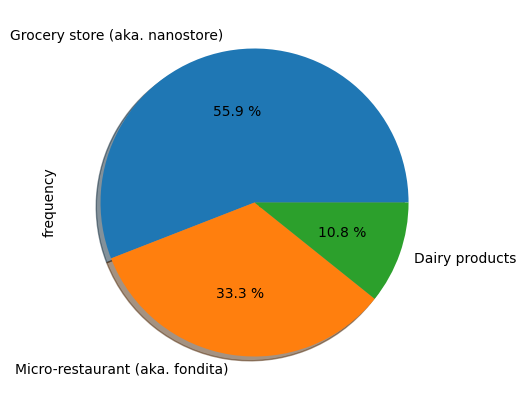

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 184_store_devices
table1= freq_tbl(filtro['184_store_devices'])
table1

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>7]
Filtro

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('184_store_devices')
Filtro_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708


<Axes: ylabel='frequency'>

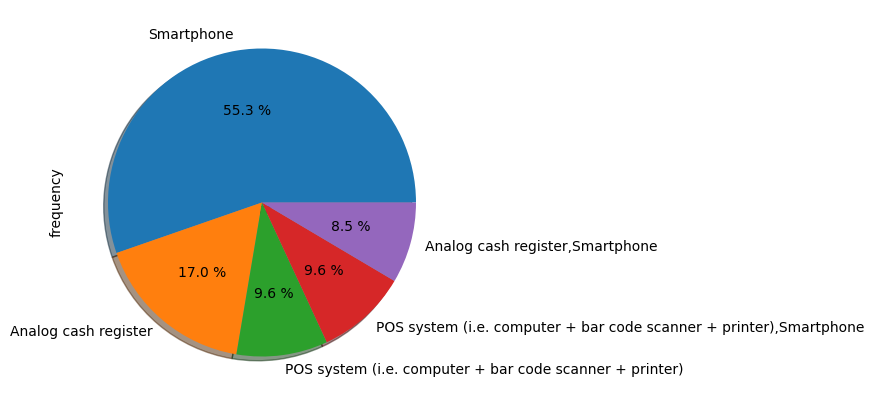

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 103_number_own_fridges
table1= freq_tbl(filtro['103_number_own_fridges'])
table1

,103_number_own_fridges,frequency,percentage,cumulative_perc
0,Sin registro,144,0.842105,0.842105
1,0.0,8,0.046784,0.888889
2,1.0,6,0.035088,0.923977
3,2.0,6,0.035088,0.959064
4,3.0,2,0.011696,0.970760
5,7.0,2,0.011696,0.982456
6,5.0,2,0.011696,0.994152
7,20.0,1,0.005848,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,103_number_own_fridges,frequency,percentage,cumulative_perc
0,Sin registro,144,0.842105,0.842105
1,0.0,8,0.046784,0.888889
2,1.0,6,0.035088,0.923977
3,2.0,6,0.035088,0.959064


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('103_number_own_fridges')
Filtro_index

,frequency,percentage,cumulative_perc
103_number_own_fridges,,,
Sin registro,144,0.842105,0.842105
0.0,8,0.046784,0.888889
1.0,6,0.035088,0.923977
2.0,6,0.035088,0.959064


<Axes: ylabel='frequency'>

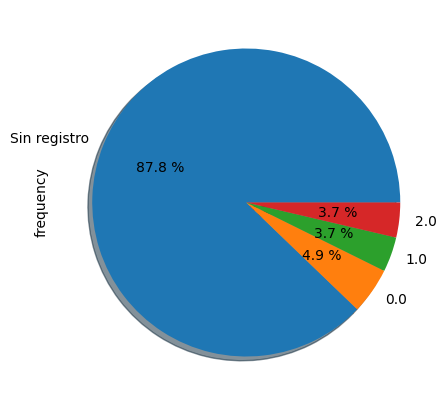

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 310_burnout
table1= freq_tbl(filtro['310_burnout'])
table1

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,Sin registro,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,Sin registro,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('310_burnout')
Filtro_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
Sin registro,64,0.374269,0.771930
yes,39,0.228070,1.000000


<Axes: ylabel='frequency'>

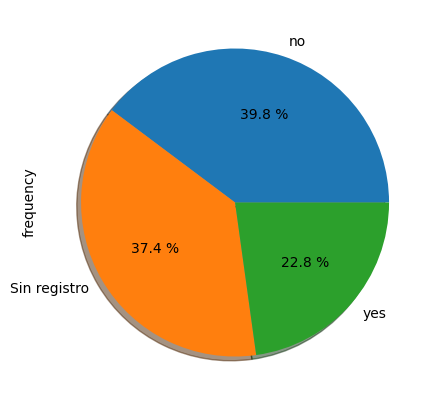

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 24_burnout
table1= freq_tbl(filtro['24_burnout'])
table1

,24_burnout,frequency,percentage,cumulative_perc
0,Sin registro,133,0.777778,0.777778
1,7.0,11,0.064327,0.842105
2,3.0,9,0.052632,0.894737
3,2.0,6,0.035088,0.929825
4,1.0,4,0.023392,0.953216
5,4.0,3,0.017544,0.970760
6,5.0,3,0.017544,0.988304
7,6.0,2,0.011696,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,24_burnout,frequency,percentage,cumulative_perc
0,Sin registro,133,0.777778,0.777778
1,7.0,11,0.064327,0.842105
2,3.0,9,0.052632,0.894737
3,2.0,6,0.035088,0.929825


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('24_burnout')
Filtro_index

,frequency,percentage,cumulative_perc
24_burnout,,,
Sin registro,133,0.777778,0.777778
7.0,11,0.064327,0.842105
3.0,9,0.052632,0.894737
2.0,6,0.035088,0.929825


<Axes: ylabel='frequency'>

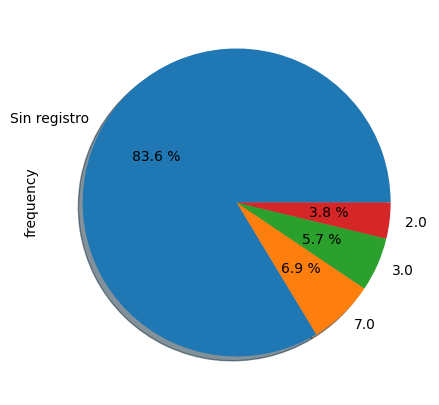

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 272_card_days_receive_money
table1= freq_tbl(filtro['272_card_days_receive_money'])
table1

,272_card_days_receive_money,frequency,percentage,cumulative_perc
0,Sin registro,127,0.742690,0.742690
1,1.0,30,0.175439,0.918129
2,0.0,10,0.058480,0.976608
3,3.0,2,0.011696,0.988304
4,2.0,1,0.005848,0.994152
5,5.0,1,0.005848,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,272_card_days_receive_money,frequency,percentage,cumulative_perc
0,Sin registro,127,0.742690,0.742690
1,1.0,30,0.175439,0.918129
2,0.0,10,0.058480,0.976608


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('272_card_days_receive_money')
Filtro_index

,frequency,percentage,cumulative_perc
272_card_days_receive_money,,,
Sin registro,127,0.742690,0.742690
1.0,30,0.175439,0.918129
0.0,10,0.058480,0.976608


<Axes: ylabel='frequency'>

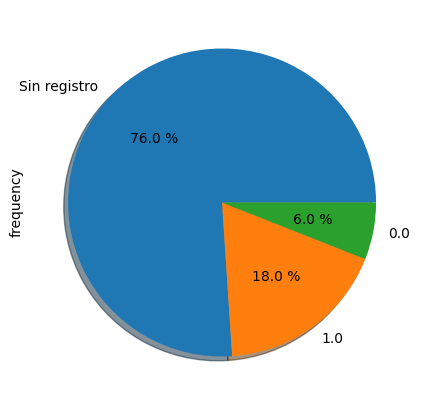

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 193_sales_planning_tools
table1= freq_tbl(filtro['193_sales_planning_tools'])
table1

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Sin registro,89,0.520468,0.520468
1,Ninguna,33,0.192982,0.713450
2,Cuaderno,21,0.122807,0.836257
3,Software especializado,6,0.035088,0.871345
4,Excel,6,0.035088,0.906433
5,"Cuaderno,Excel",3,0.017544,0.923977
6,"Cuaderno,Ninguna",2,0.011696,0.935673
7,Other,1,0.005848,0.941520
8,Mental,1,0.005848,0.947368
9,Por temporada de pan,1,0.005848,0.953216


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Sin registro,89,0.520468,0.520468
1,Ninguna,33,0.192982,0.713450
2,Cuaderno,21,0.122807,0.836257
3,Software especializado,6,0.035088,0.871345
4,Excel,6,0.035088,0.906433


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('193_sales_planning_tools')
Filtro_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Sin registro,89,0.520468,0.520468
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433


<Axes: ylabel='frequency'>

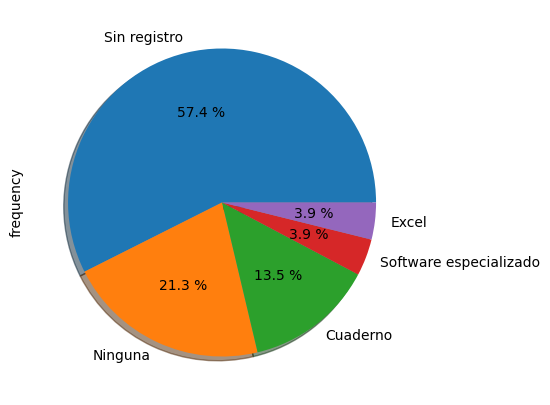

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 62_frequency_only_services
table1= freq_tbl(filtro['62_frequency_only_services'])
table1

,62_frequency_only_services,frequency,percentage,cumulative_perc
0,Sin registro,147,0.859649,0.859649
1,0.0,7,0.040936,0.900585
2,2.0,4,0.023392,0.923977
3,1.0,4,0.023392,0.947368
4,7.0,2,0.011696,0.959064
5,4.0,1,0.005848,0.964912
6,28.0,1,0.005848,0.970760
7,100.0,1,0.005848,0.976608
8,50.0,1,0.005848,0.982456
9,5.0,1,0.005848,0.988304


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>3]
Filtro

,62_frequency_only_services,frequency,percentage,cumulative_perc
0,Sin registro,147,0.859649,0.859649
1,0.0,7,0.040936,0.900585
2,2.0,4,0.023392,0.923977
3,1.0,4,0.023392,0.947368


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('62_frequency_only_services')
Filtro_index

,frequency,percentage,cumulative_perc
62_frequency_only_services,,,
Sin registro,147,0.859649,0.859649
0.0,7,0.040936,0.900585
2.0,4,0.023392,0.923977
1.0,4,0.023392,0.947368


<Axes: ylabel='frequency'>

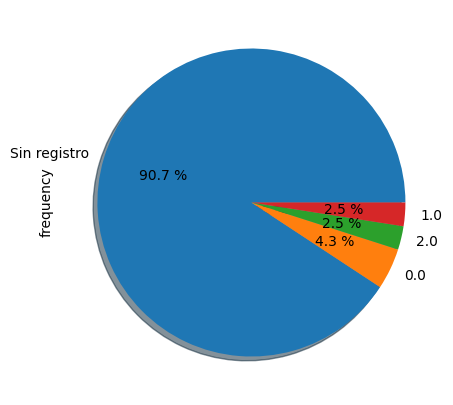

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 77_delivery_timeslots
table1= freq_tbl(filtro['77_delivery_timeslots'])
table1

,77_delivery_timeslots,frequency,percentage,cumulative_perc
0,Sin registro,169,0.988304,0.988304
1,Tarde (12:00 - 7:00 pm),2,0.011696,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,77_delivery_timeslots,frequency,percentage,cumulative_perc
0,Sin registro,169,0.988304,0.988304
1,Tarde (12:00 - 7:00 pm),2,0.011696,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('77_delivery_timeslots')
Filtro_index

,frequency,percentage,cumulative_perc
77_delivery_timeslots,,,
Sin registro,169,0.988304,0.988304
Tarde (12:00 - 7:00 pm),2,0.011696,1.000000


<Axes: ylabel='frequency'>

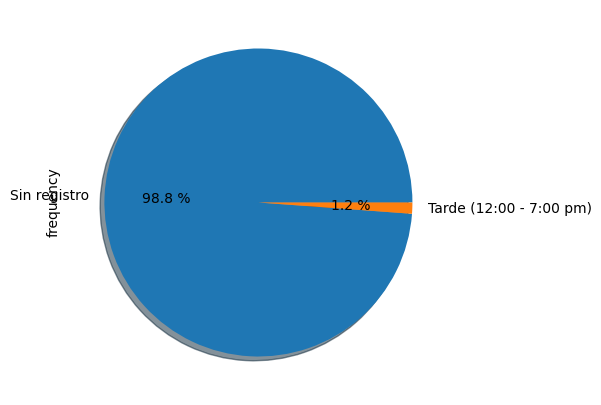

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 44_willingness_inventory_management_suppliers
table1= freq_tbl(filtro['44_willingness_inventory_management_suppliers'])
table1

,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Sin registro,92,0.538012,0.538012
1,Totalmente en desacuerdo,58,0.339181,0.877193
2,Algo en desacuerdo,8,0.046784,0.923977
3,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
4,Algo de acuerdo,5,0.029240,0.982456
5,Totalmente de acuerdo,3,0.017544,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>4]
Filtro

,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Sin registro,92,0.538012,0.538012
1,Totalmente en desacuerdo,58,0.339181,0.877193
2,Algo en desacuerdo,8,0.046784,0.923977
3,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
4,Algo de acuerdo,5,0.029240,0.982456


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('44_willingness_inventory_management_suppliers')
Filtro_index

,frequency,percentage,cumulative_perc
44_willingness_inventory_management_suppliers,,,
Sin registro,92,0.538012,0.538012
Totalmente en desacuerdo,58,0.339181,0.877193
Algo en desacuerdo,8,0.046784,0.923977
Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
Algo de acuerdo,5,0.029240,0.982456


<Axes: ylabel='frequency'>

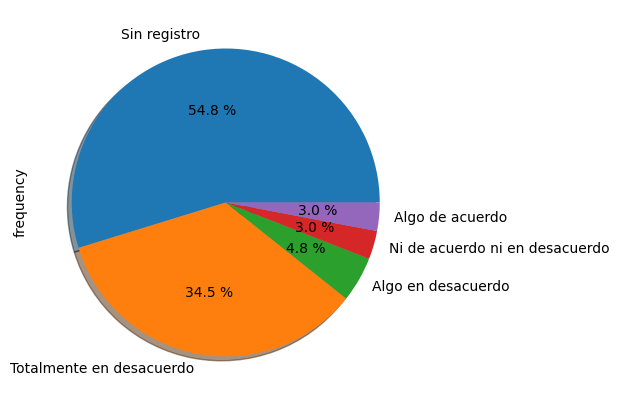

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 45_willingness_reorder_suppliers
table1= freq_tbl(filtro['45_willingness_reorder_suppliers'])
table1

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,Sin registro,94,0.549708,0.549708
1,Totalmente en desacuerdo,40,0.233918,0.783626
2,Algo de acuerdo,12,0.070175,0.853801
3,Algo en desacuerdo,10,0.058480,0.912281
4,Totalmente de acuerdo,9,0.052632,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,45_willingness_reorder_suppliers,frequency,percentage,cumulative_perc
0,Sin registro,94,0.549708,0.549708
1,Totalmente en desacuerdo,40,0.233918,0.783626
2,Algo de acuerdo,12,0.070175,0.853801


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('45_willingness_reorder_suppliers')
Filtro_index

,frequency,percentage,cumulative_perc
45_willingness_reorder_suppliers,,,
Sin registro,94,0.549708,0.549708
Totalmente en desacuerdo,40,0.233918,0.783626
Algo de acuerdo,12,0.070175,0.853801


<Axes: ylabel='frequency'>

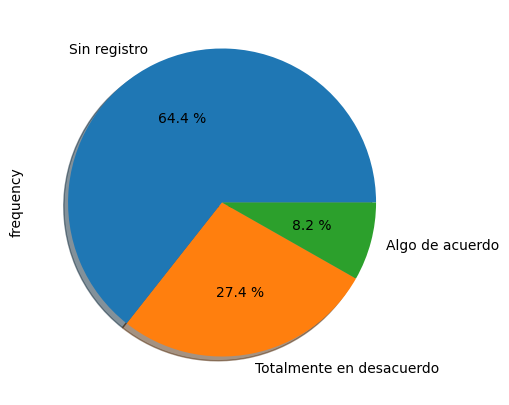

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 46_willingness_reorder_suppliers_variety
table1= freq_tbl(filtro['46_willingness_reorder_suppliers_variety'])
table1

,46_willingness_reorder_suppliers_variety,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente en desacuerdo,33,0.192982,0.760234
2,Totalmente de acuerdo,15,0.087719,0.847953
3,Algo de acuerdo,14,0.081871,0.929825
4,Algo en desacuerdo,7,0.040936,0.970760
5,Ni de acuerdo ni en desacuerdo,5,0.029240,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,46_willingness_reorder_suppliers_variety,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente en desacuerdo,33,0.192982,0.760234
2,Totalmente de acuerdo,15,0.087719,0.847953
3,Algo de acuerdo,14,0.081871,0.929825


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('46_willingness_reorder_suppliers_variety')
Filtro_index

,frequency,percentage,cumulative_perc
46_willingness_reorder_suppliers_variety,,,
Sin registro,97,0.567251,0.567251
Totalmente en desacuerdo,33,0.192982,0.760234
Totalmente de acuerdo,15,0.087719,0.847953
Algo de acuerdo,14,0.081871,0.929825


<Axes: ylabel='frequency'>

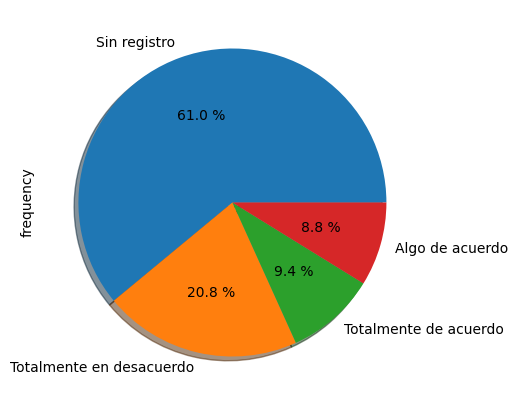

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 279_changes_procurement_pandemic
table1= freq_tbl(filtro['279_changes_procurement_pandemic'])
table1

,279_changes_procurement_pandemic,frequency,percentage,cumulative_perc
0,Sin registro,148,0.865497,0.865497
1,"Disminución de la variedad de productos,Dismin...",6,0.035088,0.900585
2,"Disminuir la cantidad del pedido,Disminuir la ...",3,0.017544,0.918129
3,Disminuir la cantidad del pedido,3,0.017544,0.935673
4,Ninguna de las anteriores,3,0.017544,0.953216
5,Disminuir la frecuencia de pedidos,3,0.017544,0.970760
6,"Aumentar la variedad de productos.,Disminuir l...",2,0.011696,0.982456
7,Aumentar la variedad de productos.,1,0.005848,0.988304
8,"Aumentar la cantidad del pedido,Disminución de...",1,0.005848,0.994152
9,Aumentar la cantidad del pedido,1,0.005848,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>2]
Filtro

,279_changes_procurement_pandemic,frequency,percentage,cumulative_perc
0,Sin registro,148,0.865497,0.865497
1,"Disminución de la variedad de productos,Dismin...",6,0.035088,0.900585
2,"Disminuir la cantidad del pedido,Disminuir la ...",3,0.017544,0.918129
3,Disminuir la cantidad del pedido,3,0.017544,0.935673
4,Ninguna de las anteriores,3,0.017544,0.953216
5,Disminuir la frecuencia de pedidos,3,0.017544,0.970760


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('279_changes_procurement_pandemic')
Filtro_index

,frequency,percentage,cumulative_perc
279_changes_procurement_pandemic,,,
Sin registro,148,0.865497,0.865497
"Disminución de la variedad de productos,Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos",6,0.035088,0.900585
"Disminuir la cantidad del pedido,Disminuir la frecuencia de pedidos",3,0.017544,0.918129
Disminuir la cantidad del pedido,3,0.017544,0.935673
Ninguna de las anteriores,3,0.017544,0.953216
Disminuir la frecuencia de pedidos,3,0.017544,0.970760


<Axes: ylabel='frequency'>

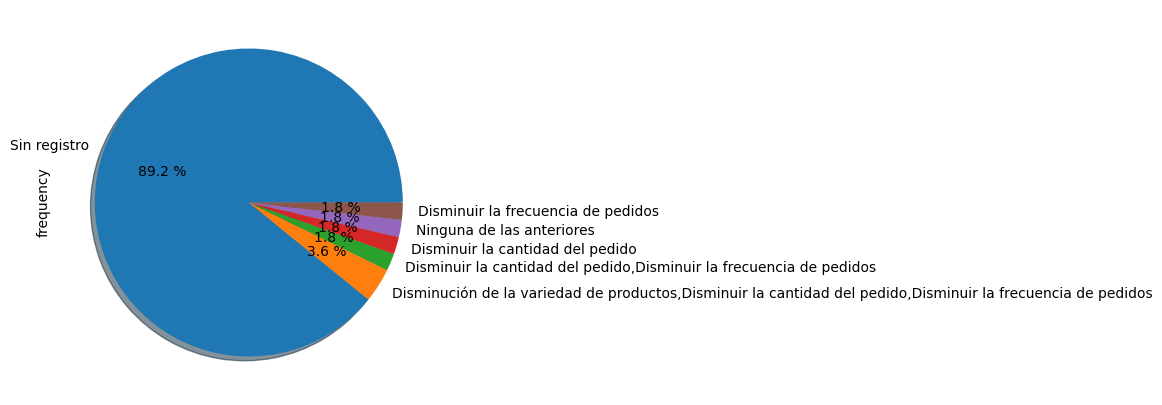

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 157_frequency_organize_shelves
table1= freq_tbl(filtro['157_frequency_organize_shelves'])
table1

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Sin registro,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304
7,Semestralmente,1,0.005848,0.994152
8,No se tiene,1,0.005848,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Sin registro,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Sin registro,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368


<Axes: ylabel='frequency'>

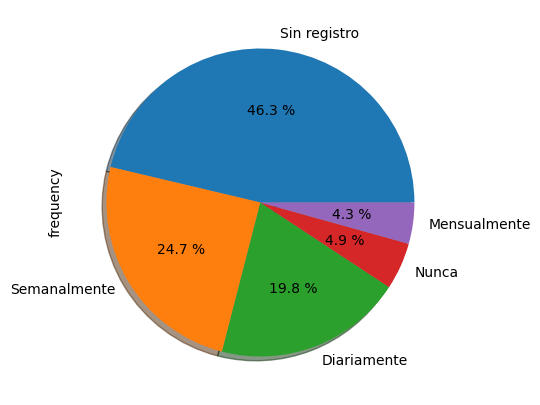

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 161_actions_stockouts
table1= freq_tbl(filtro['161_actions_stockouts'])
table1

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Sin registro,79,0.461988,0.461988
1,Solicitar tiempo al cliente para conseguir el ...,31,0.181287,0.643275
2,Ofrecer un producto sustituto,20,0.116959,0.760234
3,"Ofrecer un producto sustituto,Solicitar tiempo...",12,0.070175,0.830409
4,Perder la venta,8,0.046784,0.877193
5,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.906433
6,Informar al proveedor,5,0.029240,0.935673
7,"Informar al proveedor,Ofrecer un producto sust...",3,0.017544,0.953216
8,"Informar al proveedor,Ofrecer un producto sust...",2,0.011696,0.964912
9,"Informar al proveedor,Perder la venta",2,0.011696,0.976608


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Sin registro,79,0.461988,0.461988
1,Solicitar tiempo al cliente para conseguir el ...,31,0.181287,0.643275
2,Ofrecer un producto sustituto,20,0.116959,0.760234
3,"Ofrecer un producto sustituto,Solicitar tiempo...",12,0.070175,0.830409
4,Perder la venta,8,0.046784,0.877193


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('161_actions_stockouts')
Filtro_index

,frequency,percentage,cumulative_perc
161_actions_stockouts,,,
Sin registro,79,0.461988,0.461988
Solicitar tiempo al cliente para conseguir el producto,31,0.181287,0.643275
Ofrecer un producto sustituto,20,0.116959,0.760234
"Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto",12,0.070175,0.830409
Perder la venta,8,0.046784,0.877193


<Axes: ylabel='frequency'>

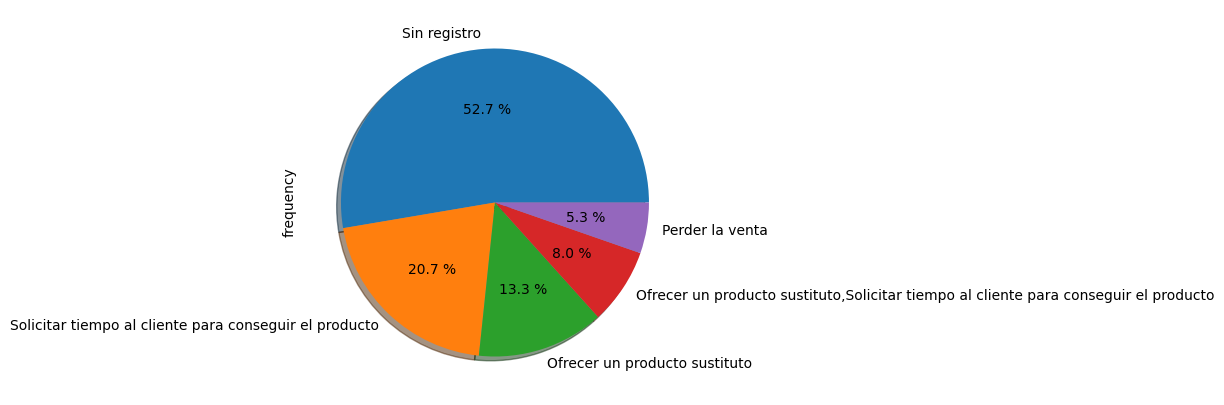

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 162_inventory_extra_space
table1= freq_tbl(filtro['162_inventory_extra_space'])
table1

,162_inventory_extra_space,frequency,percentage,cumulative_perc
0,Sin registro,82,0.479532,0.479532
1,0,29,0.169591,0.649123
2,20%,20,0.116959,0.766082
3,10%,17,0.099415,0.865497
4,30%,10,0.058480,0.923977
5,50% +,9,0.052632,0.976608
6,40%,3,0.017544,0.994152
7,2%,1,0.005848,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,162_inventory_extra_space,frequency,percentage,cumulative_perc
0,Sin registro,82,0.479532,0.479532
1,0,29,0.169591,0.649123
2,20%,20,0.116959,0.766082
3,10%,17,0.099415,0.865497


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('162_inventory_extra_space')
Filtro_index

,frequency,percentage,cumulative_perc
162_inventory_extra_space,,,
Sin registro,82,0.479532,0.479532
0,29,0.169591,0.649123
20%,20,0.116959,0.766082
10%,17,0.099415,0.865497


<Axes: ylabel='frequency'>

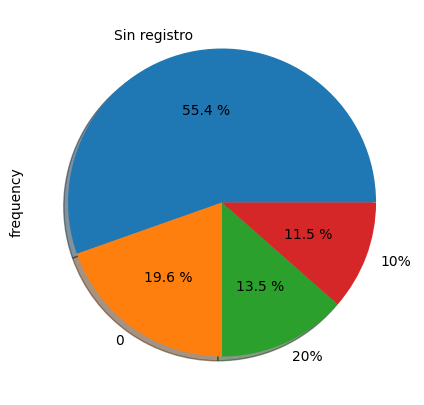

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 250_technology_investment_operations
table1= freq_tbl(filtro['250_technology_investment_operations'])
table1

,250_technology_investment_operations,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente de acuerdo,34,0.198830,0.766082
2,De acuerdo,20,0.116959,0.883041
3,Totalmente en desacuerdo,8,0.046784,0.929825
4,En desacuerdo,6,0.035088,0.964912
5,Ni de acuerdo ni en desacuerdo,6,0.035088,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,250_technology_investment_operations,frequency,percentage,cumulative_perc
0,Sin registro,97,0.567251,0.567251
1,Totalmente de acuerdo,34,0.198830,0.766082
2,De acuerdo,20,0.116959,0.883041


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('250_technology_investment_operations')
Filtro_index

,frequency,percentage,cumulative_perc
250_technology_investment_operations,,,
Sin registro,97,0.567251,0.567251
Totalmente de acuerdo,34,0.198830,0.766082
De acuerdo,20,0.116959,0.883041


<Axes: ylabel='frequency'>

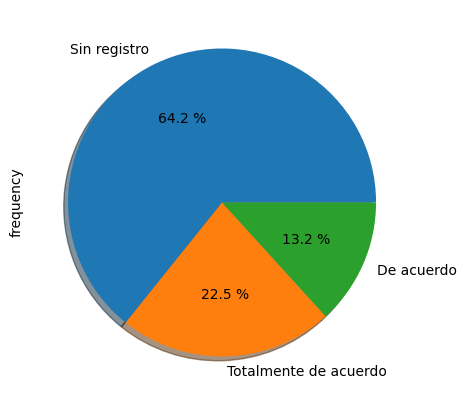

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 251_technology_investment_customers
table1= freq_tbl(filtro['251_technology_investment_customers'])
table1

,251_technology_investment_customers,frequency,percentage,cumulative_perc
0,Sin registro,98,0.573099,0.573099
1,Totalmente de acuerdo,35,0.204678,0.777778
2,De acuerdo,23,0.134503,0.912281
3,Totalmente en desacuerdo,7,0.040936,0.953216
4,Ni de acuerdo ni en desacuerdo,5,0.029240,0.982456
5,En desacuerdo,3,0.017544,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>5]
Filtro

,251_technology_investment_customers,frequency,percentage,cumulative_perc
0,Sin registro,98,0.573099,0.573099
1,Totalmente de acuerdo,35,0.204678,0.777778
2,De acuerdo,23,0.134503,0.912281
3,Totalmente en desacuerdo,7,0.040936,0.953216


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('251_technology_investment_customers')
Filtro_index

,frequency,percentage,cumulative_perc
251_technology_investment_customers,,,
Sin registro,98,0.573099,0.573099
Totalmente de acuerdo,35,0.204678,0.777778
De acuerdo,23,0.134503,0.912281
Totalmente en desacuerdo,7,0.040936,0.953216


<Axes: ylabel='frequency'>

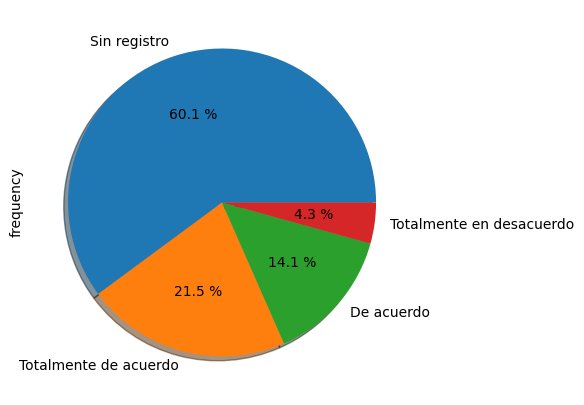

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico columna 254_technology_roadmap
table1= freq_tbl(filtro['254_technology_roadmap'])
table1

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Sin registro,100,0.584795,0.584795
1,Totalmente en desacuerdo,32,0.187135,0.771930
2,Totalmente de acuerdo,12,0.070175,0.842105
3,De acuerdo,11,0.064327,0.906433
4,Ni de acuerdo ni en desacuerdo,9,0.052632,0.959064
5,En desacuerdo,7,0.040936,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>10]
Filtro

,254_technology_roadmap,frequency,percentage,cumulative_perc
0,Sin registro,100,0.584795,0.584795
1,Totalmente en desacuerdo,32,0.187135,0.771930
2,Totalmente de acuerdo,12,0.070175,0.842105
3,De acuerdo,11,0.064327,0.906433


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('254_technology_roadmap')
Filtro_index

,frequency,percentage,cumulative_perc
254_technology_roadmap,,,
Sin registro,100,0.584795,0.584795
Totalmente en desacuerdo,32,0.187135,0.771930
Totalmente de acuerdo,12,0.070175,0.842105
De acuerdo,11,0.064327,0.906433


<Axes: ylabel='frequency'>

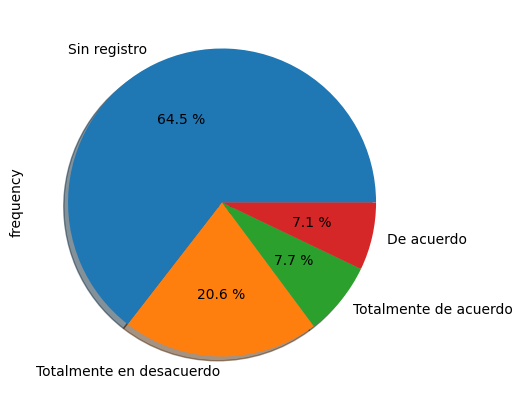

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Convertir DataFrame a CSV
filtro.to_csv("Filtro.csv")

In [ ]:
#descargar archivo filtrado en csv
from google.colab import files 
  
  
files.download("Filtro.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>